#### Interpret Several Files and Combine Them Into One Data

In [1]:
# Load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Locate several csv files in the local directory and put into
# dataframe for each file and add 'Year' column
data_dict = {}
data_directory = 'world_happiness_data'

for dirname, _, filenames in os.walk(data_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df_filename = pd.read_csv(os.path.join(dirname, filename))
        df_filename['Year'] = filename[:-4]
        data_dict[filename[:-4]] = df_filename # to save DataFrame into dictionary 'data_dict' while using Year as a key

world_happiness_data/2020.csv
world_happiness_data/2021.csv
world_happiness_data/2022.csv
world_happiness_data/2019.csv
world_happiness_data/2018.csv
world_happiness_data/2015.csv
world_happiness_data/2016.csv
world_happiness_data/2017.csv


In [3]:
# look at the columns of each file,
# whether it has the same variables on each file
for df_key in data_dict:
    print(df_key)
    print(data_dict[df_key].columns)
    print(len(data_dict[df_key].columns)) # count number of element in 'columns'

2020
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Year'],
      dtype='object')
21
2021
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explaine

By looking at column names on each files, the column names are inconsistent. For this analysis process we need these following columns:
Country, Year, Region, GDP, Health (Life Expectancy), Social Support, Freedom (to make life choices), Generosity, Trust (Goverment Corruption), and Happiness Score

For the next step we need to combine these files into one dataset, add missing columns, and use consistent column names.

In [4]:
data_dict.keys()

dict_keys(['2020', '2021', '2022', '2019', '2018', '2015', '2016', '2017'])

In [5]:
# Define right and consistent column names
# 2015 data
data_15 = data_dict['2015'].copy()
data_15 = data_15[['Year', 'Country', 'Region', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score',]]
data_15.rename(columns = {
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Family': 'Social Support',
    'Trust (Government Corruption)': 'Trust',
    'Happiness Score': 'Score'},
               inplace=True)
data_dict['2015'] = data_15
del data_15

# 2016 data
data_16 = data_dict['2016'].copy()
data_16 = data_16[['Year', 'Country', 'Region', 'Economy (GDP per Capita)',
                   'Health (Life Expectancy)', 'Family', 'Freedom',
                   'Generosity', 'Trust (Government Corruption)',
                   'Happiness Score',
                  ]]
data_16.rename(columns = {
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Family': 'Social Support',
    'Trust (Government Corruption)': 'Trust',
    'Happiness Score': 'Score'},
               inplace=True)
data_dict['2016'] = data_16
del data_16

# 2017 data
data_17 = data_dict['2017'].copy()
data_17 = data_17[['Year', 'Country', 'Economy..GDP.per.Capita.',
                   'Health..Life.Expectancy.', 'Family', 'Freedom', 
                   'Generosity', 'Trust..Government.Corruption.', 
                   'Happiness.Score',
                  ]]
data_17.rename(columns = {
    'Economy..GDP.per.Capita.': 'Economy',
    'Health..Life.Expectancy.': 'Health',
    'Family': 'Social Support',
    'Trust..Government.Corruption.': 'Trust',
    'Happiness.Score': 'Score'},
               inplace=True)
data_dict['2017'] = data_17
del data_17

# 2018 data
data_18 = data_dict['2018'].copy()
data_18 = data_18[['Year', 'Country or region', 'GDP per capita',
                   'Healthy life expectancy', 'Social support',
                   'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption', 'Score',
                  ]]
data_18.rename(columns = {
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Health',
    'Social support': 'Social Support',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',},
               inplace=True)
data_dict['2018'] = data_18
del data_18

# 2019 data
data_19 = data_dict['2019'].copy()
data_19 = data_19[['Year', 'Country or region', 'GDP per capita',
                   'Healthy life expectancy', 'Social support',
                   'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption', 'Score',
                  ]]
data_19.rename(columns = {
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Health',
    'Social support': 'Social Support',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',},
               inplace=True)
data_dict['2019'] = data_19
del data_19

# 2020 data
data_20 = data_dict['2020'].copy()
data_20 = data_20[['Year', 'Country name', 'Regional indicator',
                   'Logged GDP per capita', 'Healthy life expectancy',
                   'Social support', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Ladder score',
                  ]]
data_20.rename(columns = {
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Logged GDP per capita': 'Economy',
    'Healthy life expectancy': 'Health',
    'Social support': 'Social Support',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Ladder score': 'Score'},
               inplace=True)
data_dict['2020'] = data_20
del data_20

# 2021 data
data_21 = data_dict['2021'].copy()
data_21 = data_21[['Year', 'Country name', 'Regional indicator',
                   'Logged GDP per capita', 'Healthy life expectancy',
                   'Social support', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Ladder score',
                  ]]
data_21.rename(columns = {
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Logged GDP per capita': 'Economy',
    'Healthy life expectancy': 'Health',
    'Social support': 'Social Support',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Ladder score': 'Score'},
               inplace=True)
data_dict['2021'] = data_21
del data_21

# 2022 data
data_22 = data_dict['2022'].copy()
data_22 = data_22[['Year', 'Country', 'Explained by: GDP per capita',
                   'Explained by: Healthy life expectancy', 'Explained by: Social support', 
                   'Explained by: Freedom to make life choices',
                   'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                   'Happiness score',]]
data_22.rename(columns = {
    'Explained by: GDP per capita': 'Economy',
    'Explained by: Healthy life expectancy': 'Health',
    'Explained by: Social support': 'Social Support',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust',
    'Happiness score': 'Score'},
               inplace=True)
data_dict['2022'] = data_22
del data_22

During naming these column, we found out that region attribute are missing on some data. To ensure this finding, let's have a look

In [6]:
for df_key in data_dict:
    print(df_key, len(data_dict[df_key].columns),
          'Region' in list(data_dict[df_key].columns),
          sep='\t')

2020	10	True
2021	10	True
2022	9	False
2019	9	False
2018	9	False
2015	10	True
2016	10	True
2017	9	False


Do also for number of countries for each data. Perhaps there's a different as well.

In [7]:
for df_key in data_dict:
    print(df_key, len(data_dict[df_key]['Country'].unique()),
         sep='\t')

2020	153
2021	149
2022	147
2019	156
2018	156
2015	158
2016	157
2017	155


We observe that we do have different number of countries on each data. 2015 has the most number of countries (158). Maybe there's no new country added over the years since. We can check using script below

In [8]:
data_15_countries = set(data_dict['2015']['Country'])
for df_key in data_dict:
    df_key_countries = set(data_dict[df_key]['Country'])
    print(df_key, df_key_countries.issubset(data_15_countries), sep='\t')

2020	False
2021	False
2022	False
2019	False
2018	False
2015	True
2016	False
2017	False


It shows that there are countries added and removed in the upcoming years. We decide to keep only those countries present in the data for all the years.

In [9]:
# looping attribut 'Country'
mutual_countries = set(data_dict['2015']['Country'])
print(len(mutual_countries))
for df_key in data_dict:
    df_key_countries = set(data_dict[df_key]['Country'])
    mutual_countries = df_key_countries.intersection(mutual_countries)
    print(df_key, len(mutual_countries), sep='\t')

158
2020	147
2021	143
2022	119
2019	119
2018	119
2015	119
2016	118
2017	117


In [10]:
# Filter yearly data by mutual countries
for df_key in data_dict:
    data_dict[df_key] = data_dict[df_key][data_dict[df_key]['Country'].isin(mutual_countries)]
    print(df_key, len(data_dict[df_key]), sep='\t')

2020	117
2021	117
2022	117
2019	117
2018	117
2015	117
2016	117
2017	117


To add missing region column on each data, let's use this following step:
1. Check which years have it missing. In fact, we will remove the Region column from 2016 onwards as the Region names are also inconsistent.
2. Extract Country and Region columns from the 2015 data.
3. Merge the Region column with datasets missing it using the Country column.

In [11]:
# step 1
for df_key in data_dict:
    if(df_key != '2015') and ('Region' in data_dict[df_key].columns):
        data_dict[df_key].drop(['Region'], axis=1, inplace=True)
        print(df_key, len(data_dict[df_key].columns),
             'Region' in list(data_dict[df_key].columns), sep='\t')

2020	9	False
2021	9	False
2016	9	False


In [12]:
# step 2
data_reg = data_dict['2015'][['Country', 'Region']]
for df_key in ['2016', '2017', '2018', '2019', '2020', '2021', '2022']:
    data_dict[df_key] = pd.merge(data_dict[df_key], data_reg, on='Country')

In [13]:
# Let's check if placing those missing Region column are successful
for df_key in data_dict:
    print(df_key, len(data_dict[df_key].columns),
         'Region' in list(data_dict[df_key].columns),
         sep='\t')

2020	10	True
2021	10	True
2022	10	True
2019	10	True
2018	10	True
2015	10	True
2016	10	True
2017	10	True


In [14]:
# Let's combine dataset for all the years
data = pd.concat(list(data_dict.values()))
len(data) == (2022-2014)*117

True

##### Data Preprocessing, Cleaning, and Manipulating

In [15]:
data.head()

,Year,Country,Economy,Health,Social Support,Freedom,Generosity,Trust,Score,Region
0,2020,Finland,10.639267,71.900825,0.95433,0.949172,-0.059482,0.195445,7.8087,Western Europe
1,2020,Denmark,10.774001,72.402504,0.955991,0.951444,0.066202,0.168489,7.6456,Western Europe
2,2020,Switzerland,10.979933,74.102448,0.942847,0.921337,0.105911,0.303728,7.5599,Western Europe
3,2020,Iceland,10.772559,73.0,0.97467,0.948892,0.246944,0.71171,7.5045,Western Europe
4,2020,Norway,11.087804,73.200783,0.952487,0.95575,0.134533,0.263218,7.488,Western Europe


In [16]:
data.columns

Index(['Year', 'Country', 'Economy', 'Health', 'Social Support', 'Freedom',
       'Generosity', 'Trust', 'Score', 'Region'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 116
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            936 non-null    object
 1   Country         936 non-null    object
 2   Economy         936 non-null    object
 3   Health          936 non-null    object
 4   Social Support  936 non-null    object
 5   Freedom         936 non-null    object
 6   Generosity      936 non-null    object
 7   Trust           935 non-null    object
 8   Score           936 non-null    object
 9   Region          936 non-null    object
dtypes: object(10)
memory usage: 80.4+ KB


In [18]:
data.describe(include='all')

,Year,Country,Economy,Health,Social Support,Freedom,Generosity,Trust,Score,Region
count,936,936,936.00,936.000,936.000,936.000,936.000,935.000,936.00,936
unique,8,117,915.00,864.000,859.000,858.000,807.000,809.000,880.00,10
top,2020,Finland,0.96,0.815,0.942,0.334,0.175,0.082,5.89,Central and Eastern Europe
freq,117,8,4.00,5.000,3.000,3.000,5.000,7.000,3.00,192


In this process we tend to fixing some inconsistency in our data, such as formating data type. We found that some attribut that has number value in it are in string. Also, perhaps we find there are numbers written with (,) instead of (.)

In [19]:
data.dtypes

Year              object
Country           object
Economy           object
Health            object
Social Support    object
Freedom           object
Generosity        object
Trust             object
Score             object
Region            object
dtype: object

In [20]:
# Change the format data type
def str_to_float(string):
    if type(string) == str:
        string = string.replace(',' , '.')
    return float(string)

In [21]:
num_column = ['Economy', 'Health', 'Social Support', 'Freedom', 'Generosity', 'Trust', 'Score']
for col in num_column:
    data[col] = data[col].map(lambda p: str_to_float(p))

In [22]:
data.dtypes

Year               object
Country            object
Economy           float64
Health            float64
Social Support    float64
Freedom           float64
Generosity        float64
Trust             float64
Score             float64
Region             object
dtype: object

In [23]:
data['Score'].describe()

count    936.000000
mean       5.608489
std        1.067775
min        2.404000
25%        4.811250
50%        5.653000
75%        6.361600
max        7.842000
Name: Score, dtype: float64

Happiest countries with range from 6.36 to 7.84 are represent with 25% of it.

##### Analyze Process

For the next process we will answer the following questions, several analytical methods will be used to gain comprehensive insight

Q1: Is there a difference in happiness scores between developed and developing countries? If so, what is the most likely cause of the difference?

Q2: Do economic factors have a significant influence on happiness scores in different countries?

Q3: What is the correlation between life expectancy and happiness scores in different countries?

Q4: Does the level of social support affect the happiness score? is there a difference in social support levels between countries with high and low happiness scores?

Q5: Is the level of trust in government related to happiness scores in different countries?

Q6: How does the level of generosity affect happiness scores in different countries?

Q7: Is there a trend of change in happiness scores from year to year? if so, what might be the cause?

Q8: How do the happiness scores compare between the different regions? Are there significant differences in happiness factors between these regions?

Q9: How do happiness factors influence individual happiness scores in a country? Do these factors have a even impact across countries or are there regional variations?

Q10: How does the level of government corruption relate to happiness scores in different countries? Does the level of corruption have a negative impact on people's happiness?

In [24]:
# To answer Q1
# Firstly, load 'stats' function from scipy library
from scipy import stats

# Group which countries fall into the category of 
# advanced countries and emerging countries
advanced_country = ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway',
               'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg',
               'Canada', 'Australia', 'United Kingdom', 'Israel', 'Ireland',
               'Germany', 'United States', 'Belgium', 'United Arab Emirates',
               'France', 'Singapore', 'Italy', 'South Korea', 'Japan',
               'Portugal', 'Spain', 'Slovenia', 'Estonia', 'Greece', 'Croatia',
               'Cyprus', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic',
               'Slovakia', 'Malta', 'Hungary', 'Chile', 'Bahrain', 'Kuwait',
               'Argentina', 'Romania', 'Uruguay', 'Saudi Arabia']

emerging_country = ['Mexico', 'Guatemala', 'Brazil', 'El Salvador', 'Kosovo',
                     'Panama', 'Uzbekistan', 'Nicaragua', 'Colombia', 'Mauritius',
                     'Kazakhstan', 'Philippines', 'Thailand', 'Honduras',
                     'Ecuador', 'Jamaica', 'Peru', 'Serbia', 'Bolivia', 'Paraguay',
                     'Dominican Republic', 'Bosnia and Herzegovina', 'Moldova',
                     'Tajikistan', 'Montenegro', 'Russia', 'Kyrgyzstan', 'Belarus',
                     'North Cyprus', 'Libya', 'Mongolia', 'Malaysia', 'Vietnam',
                     'Indonesia', 'Ivory Coast', 'Benin', 'Congo (Brazzaville)',
                     'Azerbaijan', 'Macedonia', 'Ghana', 'Nepal', 'Turkey', 'China',
                     'Turkmenistan', 'Bulgaria', 'Morocco', 'Cameroon', 'Venezuela',
                     'Algeria', 'Senegal', 'Guinea', 'Niger', 'Laos', 'Albania',
                     'Cambodia', 'Bangladesh', 'Gabon', 'South Africa', 'Iraq',
                     'Lebanon', 'Burkina Faso', 'Mali', 'Nigeria', 'Armenia',
                     'Georgia', 'Iran', 'Jordan', 'Mozambique', 'Kenya', 'Ukraine',
                     'Liberia', 'Palestinian Territories', 'Uganda', 'Chad', 'Tunisia',
                     'Mauritania', 'Sri Lanka', 'Congo (Kinshasa)', 'Swaziland',
                     'Myanmar', 'Comoros', 'Togo', 'Ethiopia', 'Madagascar', 'Egypt',
                     'Sierra Leone', 'Burundi', 'Zambia', 'Haiti', 'Lesotho', 'India',
                     'Malawi', 'Yemen', 'Botswana', 'Tanzania',
                     'Central African Republic', 'Rwanda', 'Zimbabwe', 'Afghanistan',
                     'Bhutan', 'Syria', 'Sudan', 'Angola', 'Oman', 'Suriname',
                     'Somaliland region', 'Djibouti']

country_category = {}
for country in data['Country']:
    if country in advanced_country:
        country_category[country] = 'Advanced Country'
    else:
        country_category[country] = 'Emerging Country'
        
# Add column 'Category' into dataset
data['Category'] = data['Country'].map(country_category)

# Separate data for advanced and emerging countries
advanced_country = data[data['Category'] == 'Advanced Country']
emerging_country = data[data['Category'] == 'Emerging Country']


In [25]:
# Test the differences in happiness scores using the t-test
t_statistic, p_value = stats.ttest_ind(advanced_country['Score'],
                                       emerging_country['Score'],
                                       equal_var=False)

# Display test result
print('T-Test Result:')
print('T-Statistics:', t_statistic)
print('P-Value:', p_value)

# Interpretation of test results
alpha = 0.05 # level of signification
if p_value < alpha:
    print('There is a significant difference between the happiness scores of developed countries and developing countries.')
else:
    print('There is no significant difference between the happiness scores of developed countries and developing countries')

T-Test Result:
T-Statistics: 29.78063432287581
P-Value: 1.0724087613681365e-132
There is a significant difference between the happiness scores of developed countries and developing countries.


* T-Statistics: The t-Statistics value is 29.78063432287581. This value illustrates how big the difference is between the happiness scores of developed countries and developing countries in standard units. The higher the t-Statistics value, the greater the significant difference between the groups.

* P-Value: The P-Value is 1.0724087613681365e-132. The P-Value is a measure of statistical significance. In this case, the very small P-Value suggests that the differences observed between developed and developing country happiness scores could not have occurred by chance. A very small P-Value indicates that this difference is statistically significant.

With that said, there are significant differences in happiness scores between developed and developing countries. Developed countries may have higher happiness scores than developing countries. This could suggest that factors influencing happiness, such as the economy, health, and social support, may differ between developed and developing countries.

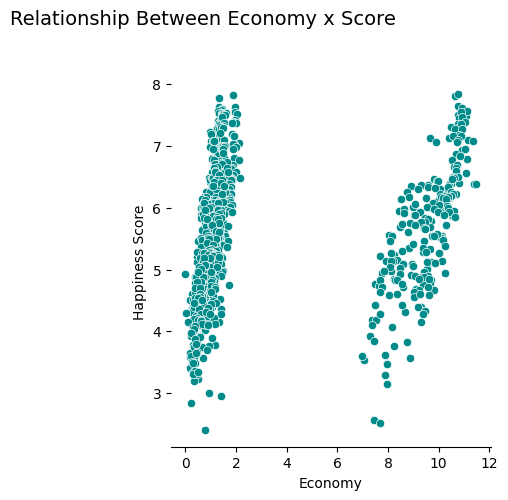

In [26]:
# To answer Q2
# But first let's check linearity between independent and dependent variables
title = 'Relationship Between Economy x Score'
fig = sns.scatterplot(data=data,
                     x='Economy',
                     y='Score',
                     color= '#008B8B')
# Set up figure
plt.title(label=title,
         x=0.1,
         y=1.12,
         fontsize=14)
fig.set(xlabel='Economy', ylabel='Happiness Score')
sns.despine(left=True)
plt.subplots_adjust(left=0.25, right=0.75)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


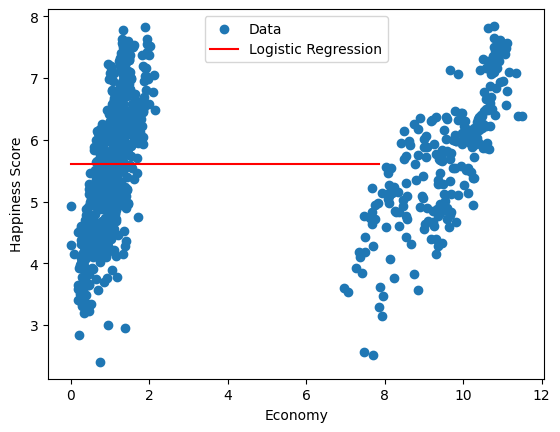

Parameter regression:
a = 3.44594571960827
b = -9.979670509148383
c = 5.608489208048686


In [27]:
# Based on scatter plot above it seems that both variables indicate
# non-linear relationship. So we decide to do non-linear regression instead
from scipy.optimize import curve_fit

data_eco = data[['Economy', 'Score']] # Select column and define dataframe name
data_eco = data_eco.dropna() # remove NaN values

# Define logistic function
def logistic_function(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Adjust the curve using the 'curve_fit' function
x = data_eco['Economy']
y = data_eco['Score']
popt, pcov = curve_fit(logistic_function, x, y)

# Plot the real data
plt.scatter(x, y, label='Data')

# Plot curve based on regression result
x_range = np.linspace(min(x), max(y), 100)
y_fit = logistic_function(x_range, *popt)
plt.plot(x_range, y_fit, 'r-', label='Logistic Regression')

plt.xlabel('Economy')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Display regression result parameter
print('Parameter regression:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])


Economic factors have a significant influence on happiness scores in various countries. In this case, a negative b value (-9.979670509148383) indicates that the higher the economic factor, the lower the happiness score. That is, countries with higher economic factors may have lower happiness scores.

In [30]:
# To answer Q3
# In this process, we tend to use other methods,
# because in the previous process the covariance
# could not be estimated properly. 
# We will use an alternative regression algorithm, 
# namely using the bootstrap function.
from sklearn.utils import resample
import statsmodels.api as sm

df_health = data[data['Health'] != 0]

# Separate independent and dependent variables
X = df_health[['Health']]
y = df_health[['Score']]

# Define bootstrap function to estimate parameter
def bootstrap_regression(X, y, n_bootstrap):
    coefs = []
    for _ in range(n_bootstrap):
        X_resampled, y_resampled = resample(X, y)
        X_resampled = sm.add_constant(X_resampled) # this one add constanta column for intercept
        model = sm.OLS(y_resampled, X_resampled)
        result = model.fit()
        coefs.append(result.params[1]) # to take regression parameter (koefisien) for independent variable
    return coefs

# Desired amount of bootstrap
n_bootstrap = 1000

# Conduct bootstrap regression
bootstrapped_coefs = bootstrap_regression(X, y, n_bootstrap)

# Calculates the mean and 95% confidence intervals of the bootstrap coefficients
coef_mean = np.mean(bootstrapped_coefs)
coef_lower = np.percentile(bootstrapped_coefs, 2.5)
coef_upper = np.percentile(bootstrapped_coefs, 97.5)

# Display the result
print('Mean coefficient:', coef_mean)
print('95% Confidence Interval:', (coef_lower, coef_upper))


Mean coefficient: 0.003167489533086409
95% Confidence Interval: (0.0007921122302093047, 0.005452910374299856)


We use the bootstrap method to estimate the regression coefficient between 'Health (life expectancy)' and 'Score (Happiness Score)', with each iteration selecting a random sample of the original data. Each of these samples is used to obtain coefficient estimates using the OLS (Least Squares) model from statsmodels.

After completing bootstrap regression, we calculate the mean and 95% confidence interval of the coefficients obtained. This provides more stable parameter estimates and more reliable confidence intervals.

* Relationship: A positive mean coefficient indicates a positive relationship between life expectancy and happiness scores. That is, the higher the life expectancy, the happiness scores tend to be higher.

* Confidence: The 95% confidence interval provides information about the range in which the true coefficient values are likely to lie. In this case, with 95% confidence, you could say that the relationship between life expectancy and happiness scores is estimated to be between 0.0007921122302093047 and 0.005452910374299856.

Health (life expectancy) has a significant positive effect on happiness scores in various countries. In this context, countries with higher life expectancies tend to have higher happiness scores. This indicates that factors that contribute to an increase in life expectancy, such as health, access to medical services, and a supportive environment, also have an impact on the level of individual happiness in that country.

In [31]:
# To answer Q4
# We're going to use linear regression and mean difference test
# to evaluate between 2 variables
# Separate for independent and dependent variable
X = data[['Social Support']]
y = data[['Score']]

# adding constanta for linear regression
X = sm.add_constant(X)

# Create model linear regression
model = sm.OLS(y, X)
result = model.fit()

# Display result
print(result.summary())

# Grouping countries with high and low happiness scores
high_happiness_country = data[data['Score'] > data['Score'].median()]
low_happiness_country = data[data['Score'] <= data['Score'].median()]

# Conduct a test for differences in the average level of social 
# support between the two groups of countries
t_statistic, p_value = stats.ttest_ind(
    high_happiness_country['Social Support'],
    low_happiness_country['Social Support'],
    equal_var=False)

# Display result
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     420.8
Date:                Sat, 13 May 2023   Prob (F-statistic):           1.70e-77
Time:                        20:18:00   Log-Likelihood:                -1214.9
No. Observations:                 936   AIC:                             2434.
Df Residuals:                     934   BIC:                             2444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6206      0.101     35.

* R-squared and Adj. R-squared: R-squared and Adj values. R-squared is 0.311 and 0.310 respectively. R-squared measures how well your regression model fits the data, and values range between 0 and 1. Higher R-squared values indicate that the independent variable (level of social support) explains about 31.1% of the variation in happiness scores. Adj. R-squared is an adjusted version of R-squared for model complexity and the number of independent variables.

* Coef: The regression coefficients you get are as follows:

    * Constant (const): The value of the constant (intercept) is 3.6206. It shows the expected happiness score when the level of social support is 0.
    * Level of Social Support: The coefficient value for the variable level of social support is 1.9497. This shows that every 1-unit increase in the level of social support is expected to increase the happiness score by 1.9497.
    
* T-Statistic and P-Value: The T-Statistic value for the level of social support is 16.20142407324294. This value measures how significant the effect of the independent variable is on the dependent variable. The P-Value obtained is 4.891486936037669e-52 (very small). This shows that the level of social support has a significant effect on the happiness score.

Insight:
1. Effect of Level of Social Support: The results of the analysis show that the level of social support has a significant effect on the happiness score. Every 1-unit increase in the level of social support is expected to increase the happiness score by 1.9497.

2. Differences in Levels of Social Support: From the results of this analysis, there is no direct information showing differences in levels of social support between countries with high and low happiness scores. However, you can see that the level of social support significantly affects the overall happiness score.

In [32]:
# To answer Q5
# In this process we evaluate the relationship also 
# calculate correlation

# Separate 2 variables
X = data['Trust'] # independent variable
y = data['Score'] # dependent variable

# Drop missing values in both X and y
data_cleaned = pd.concat([X, y], axis=1).dropna()
X = data_cleaned['Trust']
y = data_cleaned['Score']

# Calculate correlation value between 2 variables
correlation = X.corr(y)
print('Correlation between Trust and Happiness Score:', correlation)

# Adding constanta for linear regression
X = sm.add_constant(X)

# Create model linear regression
model = sm.OLS(y, X)
result = model.fit()

# Display result
print(result.summary())


Correlation between Trust and Happiness Score: 0.10609328835254188
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sat, 13 May 2023   Prob (F-statistic):            0.00116
Time:                        20:18:22   Log-Likelihood:                -1382.1
No. Observations:                 935   AIC:                             2768.
Df Residuals:                     933   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

* Correlation: The correlation between the level of trust in the government and the happiness score is 0.10609328835254188. This value indicates the level of linear relationship between the two variables. The positive correlation indicates that there is a positive, albeit weak, relationship between the level of trust in the government and the happiness score.

* R-squared and Adj. R-squared: R-squared and Adj values. R-squared is 0.011 and 0.010, respectively. The low R-squared value indicates that the variable level of trust in the government is only able to explain about 1.1% of the variation in the happiness score. Adj. R-squared is an adjusted version of R-squared for model complexity and the number of independent variables.

* Coef: The regression coefficients you get are as follows:

    * Constant (const): The value of the constant (intercept) is 5.5007. It shows the expected happiness score when the level of trust in the government is 0.
    * Level of Trust (Trust): The coefficient value for the variable level of trust is 0.3844. This shows that every 1-unit increase in the level of trust in the government is expected to increase the happiness score by 0.3844.
    
* T-Statistic and P-Value: The T-Statistic value for the level of confidence is 3.259, and the P-Value obtained is 0.001. This shows that the level of trust in the government has a significant effect on the happiness score.

Insights:
1. There is a weak positive relationship between the level of trust in the government and the happiness score. That is, the higher the level of trust in the government, the score of happiness tends to be also higher, although the effect is not that strong.

2. Low R-squared value indicates that other factors besides the level of trust in the government also have a significant effect on the happiness score. This suggests that there are other variables to consider in understanding the factors that influence happiness in these countries. Although the level of trust in government has a significant effect on happiness scores,

In [34]:
# To answer Q6
# In this process we will use linear regression
# Define dataframe that consists only 2 variables
generous_df = data[['Generosity', 'Score']]
generous_df = generous_df.dropna() # removes missing values

# Adding contant column
generous_df = sm.add_constant(generous_df)

# Separate variabel indpendent and dependent
X = generous_df['Generosity']
y = generous_df['Score']

# Create model and conduct fitting model
model = sm.OLS(y, X)
results = model.fit()

# Display result
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sat, 13 May 2023   Prob (F-statistic):            0.00116
Time:                        21:14:55   Log-Likelihood:                -1382.1
No. Observations:                 935   AIC:                             2768.
Df Residuals:                     933   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5007      0.048    115.312      0.0

Key findings from the process above

* There is a weak positive relationship between levels of generosity and happiness scores across countries. That is, the higher the level of generosity, the happiness score tends to be higher, even though the effect is not that strong.

* Although the level of generosity has a significant effect on the happiness score, the low R-squared value indicates that other factors besides the level of generosity also have a significant effect on the happiness score. This suggests that there are other variables to consider in understanding the factors that influence happiness in these countries.

* It is important to note that these results only provide a preliminary picture of the relationship between levels of generosity and happiness scores. There are other factors that can also affect happiness scores in various countries, and a more comprehensive analysis is needed to fully understand this relationship.

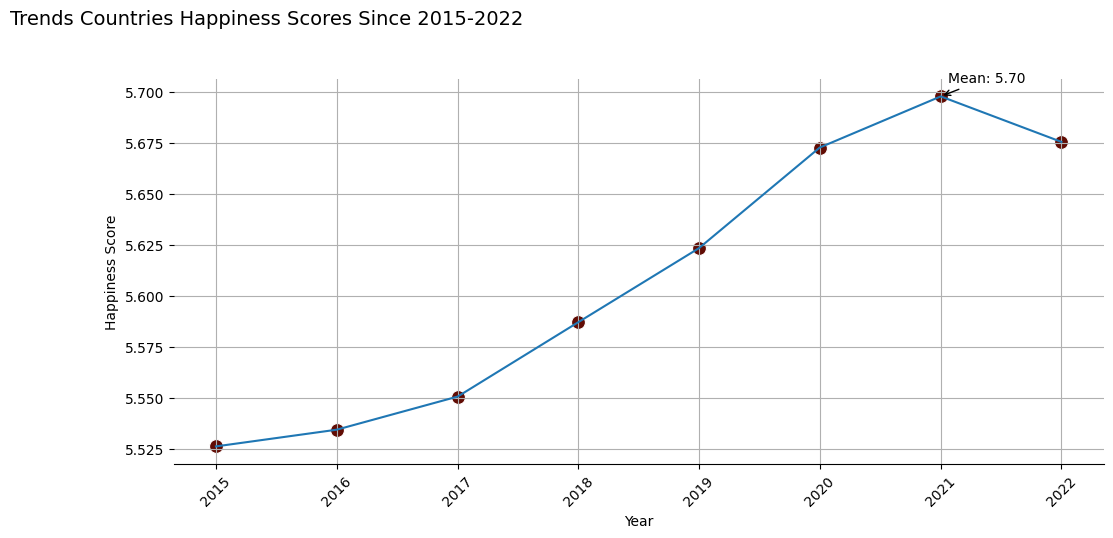

In [40]:
# To answer Q7
# We tend to use descriptive analytic process in this question

# Format Year into date format
data['Year'] = pd.to_datetime(data['Year'],
                             format='%Y')

# Calculate mean happines score yearly
mean_scores = data.groupby('Year')['Score'].mean().reset_index()

# Visualize into line plot to identify trends
title = 'Trends Countries Happiness Scores Since 2015-2022'
plt.figure(figsize=(12, 5))
fig = sns.lineplot(data=data,
                     x='Year',
                     y='Score',
                    errorbar=None)
sns.scatterplot(data=mean_scores,
               x='Year',
               y='Score',
               color='#610C04',
               marker='o',
               s=100)

# Set up figure
plt.title(label=title,
         x=0.1,
         y=1.12,
         fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
fig.set(xlabel='Year', ylabel='Happiness Score')

max_score_year = mean_scores[mean_scores['Score'] == mean_scores['Score'].max()]
plt.annotate(f"Mean: {max_score_year['Score'].values[0]:.2f}",
             xy=(max_score_year['Year'].values[0], max_score_year['Score'].values[0]),
             xytext=(5, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))
sns.despine(left=True)


We can see the average happiness score in various countries in the period from 2015 to 2022. Data shows the average happiness occurs in 2021, amounting to 5.70.

In [41]:
data['Region'].unique()

array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe',
       'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia'],
      dtype=object)

In [42]:
# To answer Q8
# We tend to use descriptive analysis and ANOVA difference test

# Conduct descriptive analysis
region_descr = data.groupby('Region')['Score'].describe()
print(region_descr)

# Conduct ANOVA difference test
anova_result = stats.f_oneway(
    data[data['Region'] == 'Western Europe']['Score'],
    data[data['Region'] == 'Australia and New Zealand']['Score'],
    data[data['Region'] == 'North America']['Score'],
    data[data['Region'] == 'Middle East and Northern Africa']['Score'],
    data[data['Region'] == 'Latin America and Caribbean']['Score'],
    data[data['Region'] == 'Southeastern Asia']['Score'],
    data[data['Region'] == 'Central and Eastern Europe']['Score'],
    data[data['Region'] == 'Sub-Saharan Africa']['Score'],
    data[data['Region'] == 'Eastern Asia']['Score'],
    data[data['Region'] == 'Southern Asia']['Score'])

# Dispplay test result
print('Anove Difference Test Result:')
print(anova_result)

                                 count      mean       std    min       25%  \
Region                                                                        
Australia and New Zealand         16.0  7.268150  0.052797  7.162  7.226700   
Central and Eastern Europe       192.0  5.538956  0.589009  4.096  5.162500   
Eastern Asia                      32.0  5.585666  0.377284  4.874  5.245750   
Latin America and Caribbean      144.0  6.065798  0.533900  4.707  5.746375   
Middle East and Northern Africa  104.0  5.407890  0.938793  2.955  4.703250   
North America                     16.0  7.123419  0.184015  6.886  6.970500   
Southeastern Asia                 64.0  5.414433  0.752524  3.819  5.007850   
Southern Asia                     48.0  4.423240  0.769889  2.404  4.146250   
Sub-Saharan Africa               168.0  4.414707  0.633909  2.839  3.968500   
Western Europe                   152.0  6.846412  0.701921  4.857  6.445750   

                                    50%       75%  

There are significant differences in happiness factors between the regions we analyze. Thus, the factors influencing happiness can differ between the regions. Small p-value indicates that there is a significant difference in the happiness factor between the tested regions. The obtained F-statistic value is 166.0713288793613. The greater the value of the F-statistic, the greater the difference between the groups tested.

We can find out more about these differences by carrying out a post hoc test to determine the differences between groups specifically.

In [43]:
# As an alternatif we can conduct post hoc test
# The purpose of this test is to know the specific differences between groups
import statsmodels.stats.multicomp as mc

# Take the required subset data for the post hoc test
posthoc_df = data[['Region', 'Score']]

# Conduct post hoc test using Tukey HSD method
posthoc = mc.MultiComparison(posthoc_df['Score'],
                            posthoc_df['Region'])
result = posthoc.tukeyhsd()

# Display result
print(result)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
      Australia and New Zealand      Central and Eastern Europe  -1.7292    0.0 -2.2768 -1.1815   True
      Australia and New Zealand                    Eastern Asia  -1.6825    0.0 -2.3269 -1.0381   True
      Australia and New Zealand     Latin America and Caribbean  -1.2024    0.0  -1.757 -0.6477   True
      Australia and New Zealand Middle East and Northern Africa  -1.8603    0.0 -2.4254 -1.2951   True
      Australia and New Zealand                   North America  -0.1447 0.9998 -0.8888  0.5994  False
      Australia and New Zealand               Southeastern Asia  -1.8537    0.0  -2.442 -1.2655   True
      Australia and New Zealand                   Southern Asia  -2.8449 

After conducting post hoc tests, it was found that happiness factors can differ significantly between regional groups, and these differences may be caused by unique factors or the social, economic, and cultural context in each region.

In [50]:
# To answer Q9
# We are going to use logistic regression to evaluate relationship

# To define biner value in happiness score column
# Set threshold
threshold = 5.0

# Format value
data['happiness_label'] = data['Score'].apply(lambda x: 1 if x >= threshold else 0)

# Define variable dependent and independent
y = data['happiness_label'] # as individual happiness score
X = data[['Freedom',
         'Trust',
         'Health',
         'Economy',
         'Social Support',
         'Generosity']] # happiness factors as independent variable

# Remove missing values to prevent error
data_cleaned = pd.concat([X, y], axis=1).dropna()
X = data_cleaned[['Freedom',
         'Trust',
         'Health',
         'Economy',
         'Social Support',
         'Generosity']]
y = data_cleaned['happiness_label']

# Adding intercept into independent variable
X = sm.add_constant(X)

# Create model logistic regression
model = sm.Logit(y, X)

# Conduct fitting model
result = model.fit()

# Display result
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.382543
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        happiness_label   No. Observations:                  935
Model:                          Logit   Df Residuals:                      928
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.3761
Time:                        23:27:46   Log-Likelihood:                -357.68
converged:                       True   LL-Null:                       -573.26
Covariance Type:            nonrobust   LLR p-value:                 5.542e-90
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.7437      0.546    -12.360      0.000      -7.813      -5.674
Freedom          

Penghentian optimisasi berhasil dengan kata-kata "Optimization terminated successfully". Hal ini menunjukkan bahwa proses optimisasi telah selesai dengan sukses.

Nilai fungsi saat ini (current function value) adalah 0.382543. Nilai ini mencerminkan tingkat kecocokan model terhadap data. Semakin rendah nilai fungsi saat ini, semakin baik model yang dihasilkan.

Jumlah iterasi yang dilakukan dalam proses optimisasi adalah 7. Ini menunjukkan berapa kali algoritme optimisasi dijalankan untuk mencapai hasil yang optimal.

Model regresi logistik yang digunakan memiliki 6 derajat kebebasan (Df Model) dan 928 derajat kebebasan residu (Df Residuals). Jumlah observasi yang digunakan dalam analisis adalah 935.

Metode yang digunakan dalam estimasi adalah MLE (Maximum Likelihood Estimation).

Pseudo R-squared adalah 0.3761. Nilai ini mengindikasikan sejauh mana variabel independen (Freedom, Trust, Health, Economy, Social Support, Generosity) dapat menjelaskan variasi dalam variabel dependen (happiness_label). Semakin tinggi nilai Pseudo R-squared, semakin baik model dalam menjelaskan variasi data.

Log-Likelihood (Log-Likelihood) adalah -357.68. LL-Null adalah -573.26. LLR p-value adalah 5.542e-90. Nilai-nilai ini terkait dengan perbandingan model Anda dengan model nol (model tanpa variabel independen). LLR p-value yang sangat rendah menunjukkan bahwa model Anda secara signifikan lebih baik daripada model nol.

Koefisien (coef) menunjukkan perkiraan efek dari setiap variabel independen terhadap log-odds (logaritma odds) dari variabel dependen. Standard error (std err) memberikan perkiraan ketidakpastian dalam estimasi koefisien. Nilai z dan P>|z| digunakan untuk menguji signifikansi koefisien. Interval kepercayaan 95% untuk koefisien diberikan oleh (0.025, 0.975).

Insights to take:

* Variables that have statistically significant coefficients (p-value <0.05) on the happiness_label dependent variable are Freedom, Trust, Health, Economy, and Social Support. That is, these variables have a significant influence on individual happiness in a country.

* The Generosity variable has a higher p-value (0.091), which indicates that its effect on individual happiness is not statistically significant at the 0.05 significance level. However, this p-value is still close to the significance limit, so further research is needed to clarify its effect.

* The positive coefficient indicates a positive relationship between the independent variables and individual happiness, while the negative coefficient indicates a negative relationship.

In [52]:
# To answer Q10

# Find correlation
correlation = data[['Trust', 'Score']].corr()
print('Correlation Coefficient:')
print(correlation)

# Set threshold
threshold = 5.0

# Format value
data['happiness_label'] = data['Score'].apply(lambda x: 1 if x >= threshold else 0)

# Define variable dependent and independent
y = data['happiness_label'] # as individual happiness score
X = data['Trust'] # happiness factors as independent variable

# Remove missing values to prevent error
data_cleaned = pd.concat([X, y], axis=1).dropna()
X = data_cleaned['Trust']
y = data_cleaned['happiness_label']

# Adding intercept into independent variable
X = sm.add_constant(X)

# Create model logistic regression
model = sm.Logit(y, X)

# Conduct fitting model
result = model.fit()

# Display result
print(result.summary())


Correlation Coefficient:
          Trust     Score
Trust  1.000000  0.106093
Score  0.106093  1.000000
Optimization terminated successfully.
         Current function value: 0.611516
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        happiness_label   No. Observations:                  935
Model:                          Logit   Df Residuals:                      933
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 May 2023   Pseudo R-squ.:                0.002605
Time:                        23:44:58   Log-Likelihood:                -571.77
converged:                       True   LL-Null:                       -573.26
Covariance Type:            nonrobust   LLR p-value:                   0.08395
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

Insights based on the process above:

* The results of the correlation analysis showed that the correlation coefficient between the variables "Trust" (level of trust) and "Score" (score of happiness) was 0.106093. This figure indicates that there is a weak positive relationship between the level of trust and the happiness score. Although the correlation is low, it still shows a relationship between the two variables.

* Furthermore, the results of logistic regression analysis show that the level of trust ("Trust" variable) has a coefficient of 0.4262 with a significance level of 0.088. The positive coefficient indicates that an increase in the level of trust has the potential to increase a person's probability of having a high happiness score.

* However, these results also show that the level of trust does not significantly affect the score of people's happiness. This can be seen from the p-value of 0.088 which is greater than the general significance level (eg, 0.05). A high P-value indicates that the relationship between the level of trust and the score of people's happiness may occur by chance or it may be caused by other factors not included in the model.

* The insight from this finding is that the level of trust has a weak effect on the score of people's happiness. This indicates that other factors, such as economic conditions, health, and social support, may have a stronger influence on people's happiness than level of trust alone.

##### Conclusion

After carrying out a series of analysis processes, we can jump to conclusions and curate some key findings from all the research questions that have been answered. Here we provide an explanation:

1. There are significant differences in happiness scores between developed and developing countries. Countries that are categorized as developed countries tend to have high happiness scores, this is because there are several supporting factors, including stable economic conditions, good health insurance, social support and freedom in life choices that are supported by policy makers in a country . These things can be used as a reference for state implementers or policy makers in developing countries in improving the quality of life of their people.

2. It has been mentioned in the previous statement that one of the factors that supports a high happiness score is ensuring health. This has been proven in most countries that have a high happiness score that a country that guarantees the quality of health and standard of living of its people can increase the happiness and comfort of life. There are several factors that also contribute to this, besides the quality of the health itself, easy access to medical services and a supportive environment also play an important role.

3. In addition, social support from both the family and the wider environment also plays an important role in increasing the level of community happiness.

4. In the case that generosity and trust in the government do not significantly affect the level of people's happiness, the positive relationship shown is not too significant, because these 2 factors do not have too much impact on the happiness score. So it can be concluded that the benchmarks for happiness in a country are guarantees of health and good life expectancy, economic stability, social support and the freedom to determine life for the community.